In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, classification_report

from rtbm import RTBM, minimizer

import rtbm.layers as layers
import rtbm.model as mdl

import warnings
warnings.filterwarnings('ignore')

from rtbm.costfunctions import mse, crossentropy


In [10]:
# Load MNIST dataset
MNIST_train = pd.read_csv('~/data/mnist_train.csv', delimiter=",",header=None).values
MNIST_test  = pd.read_csv('~/data/mnist_test.csv', delimiter=",",header=None).values

# Prepare data (normalized onto [0,1])
Y_train = MNIST_train[0:10000,0]
X_train = MNIST_train[0:10000,1:]/255.0

Y_test = MNIST_test[:,0]
X_test = MNIST_test[:,1:]/255.0

3


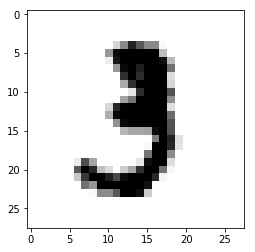

In [11]:
# Visualize individual pics
i=10
print(Y_train[i])
I=np.reshape(X_train[i], (28,28))
plt.imshow(I, interpolation='nearest',  cmap='gray_r')
plt.show()

# Logistic regression baseline

In [13]:
# Logistic regression baseline
logreg = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')

logreg.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
# On train set

P=logreg.predict(X_train)

print(classification_report(Y_train,P))
print(confusion_matrix(Y_train, P))


             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1001
          1       0.98      0.99      0.98      1127
          2       0.96      0.95      0.96       991
          3       0.96      0.95      0.96      1032
          4       0.98      0.97      0.98       980
          5       0.95      0.94      0.95       863
          6       0.99      0.99      0.99      1014
          7       0.97      0.97      0.97      1070
          8       0.95      0.96      0.95       944
          9       0.95      0.96      0.95       978

avg / total       0.97      0.97      0.97     10000

[[ 996    0    0    0    1    0    2    0    2    0]
 [   0 1111    4    1    1    3    0    0    5    2]
 [   2    5  943    3    2    5    2    7   18    4]
 [   1    3    7  983    0   21    0    7    5    5]
 [   0    2    2    0  955    0    2    1    4   14]
 [   0    3    4   20    5  815    3    0   11    2]
 [   2    2    0    0    1    4 1002    1  

In [15]:
# On test set
P=logreg.predict(X_test)

print(classification_report(Y_test,P))
print(confusion_matrix(Y_test, P))


             precision    recall  f1-score   support

          0       0.96      0.96      0.96       980
          1       0.95      0.97      0.96      1135
          2       0.90      0.87      0.89      1032
          3       0.88      0.89      0.89      1010
          4       0.90      0.92      0.91       982
          5       0.86      0.84      0.85       892
          6       0.92      0.94      0.93       958
          7       0.91      0.92      0.92      1028
          8       0.85      0.86      0.85       974
          9       0.88      0.86      0.87      1009

avg / total       0.90      0.90      0.90     10000

[[ 943    0    5    2    0   14    9    2    3    2]
 [   0 1103    6    3    0    3    4    2   14    0]
 [   5   14  896   16    8    6   15   10   55    7]
 [   3    1   29  898    2   33    3   13   19    9]
 [   2    4    6    1  900    1   16    6    9   37]
 [   9    2    5   45    9  753   19    2   35   13]
 [   9    3   12    0   16   15  897    3  

# Linear regression via CMA

In [18]:
M = mdl.Model()
M.add(layers.Linear(784,1,paramBound=100))

minim = minimizer.CMA(True)
sol=minim.train(mse, M, np.transpose(X_train), np.transpose(Y_train), maxiter=1000)

CMA on 32 cpu(s) enabled
(11_w,23)-aCMA-ES (mu_w=6.7,w_1=25%) in dimension 784 (seed=350932, Sat Oct 28 23:45:06 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     23 3.614852967138936e+03 1.0e+00 9.91e+00  1e+01  1e+01 0:00.5
    2     46 3.673372431060423e+03 1.0e+00 9.82e+00  1e+01  1e+01 0:00.9
    3     69 3.391671303291772e+03 1.0e+00 9.74e+00  1e+01  1e+01 0:01.4
   10    230 4.260792968133973e+03 1.0e+00 9.29e+00  9e+00  9e+00 0:04.8
   19    437 6.701695192519138e+03 1.0e+00 8.86e+00  9e+00  9e+00 0:08.9
   28    644 7.168308799756824e+03 1.0e+00 8.54e+00  9e+00  9e+00 0:14.0
   39    897 7.750195903883862e+03 1.0e+00 8.25e+00  8e+00  8e+00 0:20.3
   53   1219 7.367517452216564e+03 1.0e+00 7.95e+00  8e+00  8e+00 0:27.4
   68   1564 7.760042540953777e+03 1.0e+00 7.70e+00  8e+00  8e+00 0:35.4
   85   1955 8.699306391058506e+03 1.0e+00 7.48e+00  7e+00  7e+00 0:45.0
  100   2300 8.117897563360389e+03 1.0e+00 7.32e+00  7e+00  7e+00 0:52.3
  121 

In [19]:
# On train set
P=np.abs(np.round(np.real(M.predict(np.transpose(X_train)))))


print(classification_report(Y_train,P.T))
print(confusion_matrix(Y_train, P.T))

             precision    recall  f1-score   support

        0.0       0.06      0.00      0.01      1001
        1.0       0.11      0.01      0.02      1127
        2.0       0.10      0.01      0.02       991
        3.0       0.07      0.01      0.02      1032
        4.0       0.11      0.02      0.03       980
        5.0       0.04      0.01      0.01       863
        6.0       0.12      0.02      0.03      1014
        7.0       0.07      0.01      0.02      1070
        8.0       0.03      0.00      0.01       944
        9.0       0.06      0.01      0.01       978
       10.0       0.00      0.00      0.00         0
       11.0       0.00      0.00      0.00         0
       12.0       0.00      0.00      0.00         0
       13.0       0.00      0.00      0.00         0
       14.0       0.00      0.00      0.00         0
       15.0       0.00      0.00      0.00         0
       16.0       0.00      0.00      0.00         0
       17.0       0.00      0.00      0.00   

In [20]:
# On test set
P=np.abs(np.round(np.real(M.predict(np.transpose(X_test)))))

print(classification_report(Y_test,P.T))
print(confusion_matrix(Y_test, P.T))

             precision    recall  f1-score   support

        0.0       0.11      0.01      0.01       980
        1.0       0.10      0.01      0.02      1135
        2.0       0.10      0.01      0.02      1032
        3.0       0.11      0.01      0.03      1010
        4.0       0.09      0.01      0.02       982
        5.0       0.07      0.01      0.02       892
        6.0       0.09      0.01      0.02       958
        7.0       0.06      0.01      0.01      1028
        8.0       0.11      0.02      0.03       974
        9.0       0.11      0.01      0.02      1009
       10.0       0.00      0.00      0.00         0
       11.0       0.00      0.00      0.00         0
       12.0       0.00      0.00      0.00         0
       13.0       0.00      0.00      0.00         0
       14.0       0.00      0.00      0.00         0
       15.0       0.00      0.00      0.00         0
       16.0       0.00      0.00      0.00         0
       17.0       0.00      0.00      0.00   